In [0]:
# !curl https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip -o flower_data.zip
# !mkdir -p flower
# !unzip flower_data.zip -d flower
# !wget -cq https://github.com/udacity/pytorch_challenge/raw/master/cat_to_name.json -o flower/flower_datacat_to_name.json

In [0]:
# !mv cat_to_name.json flower/flower_data/

In [0]:
from fastai.vision import *
import json

In [13]:
path = Path('flower/flower_data')
path.ls()

[PosixPath('flower/flower_data/cat_to_name.json'),
 PosixPath('flower/flower_data/train'),
 PosixPath('flower/flower_data/valid')]

In [14]:
files = (path/'valid').ls()
files[:4]

[PosixPath('flower/flower_data/valid/13'),
 PosixPath('flower/flower_data/valid/27'),
 PosixPath('flower/flower_data/valid/79'),
 PosixPath('flower/flower_data/valid/2')]

In [0]:
with open(path/'cat_to_name.json', 'r') as f:
    label_map = json.load(f)

In [0]:
sz=224
bs=64

In [0]:
def foo(path, **kwargs):
    cl = path.parent.stem
    return label_map[cl]

In [0]:
src = (ImageList.from_folder(path)
       .split_by_folder(train='train', valid='valid')
       .label_from_func(func=foo)
       )

data = (src.transform(get_transforms(), size=224)
       .databunch(bs=bs)
       .normalize(imagenet_stats))

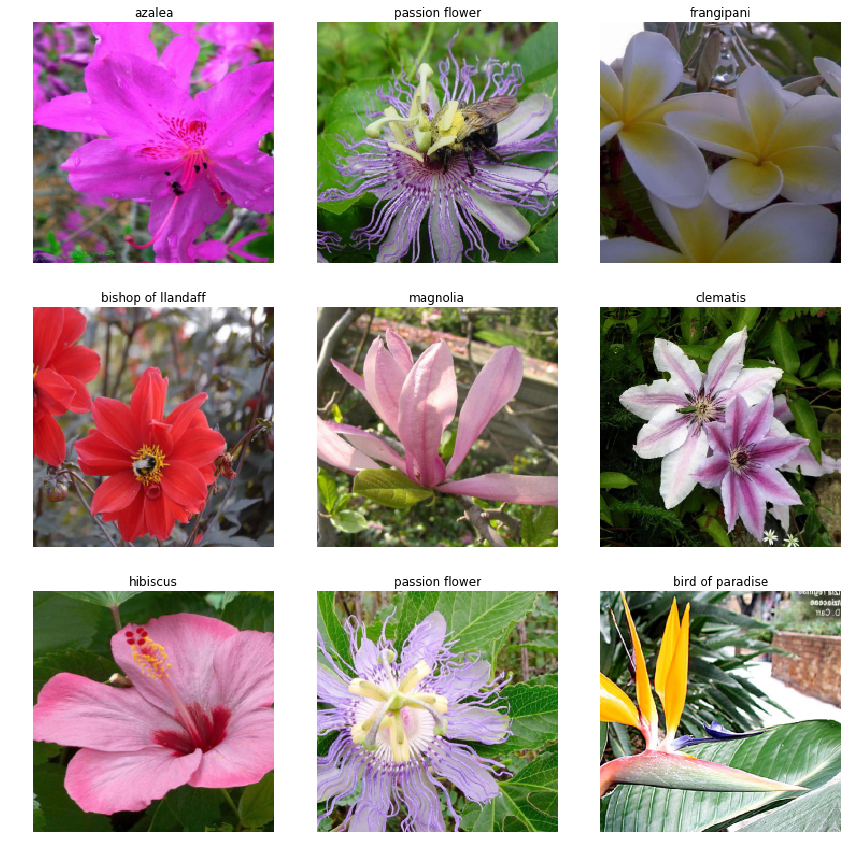

In [46]:
data.show_batch(rows=3)

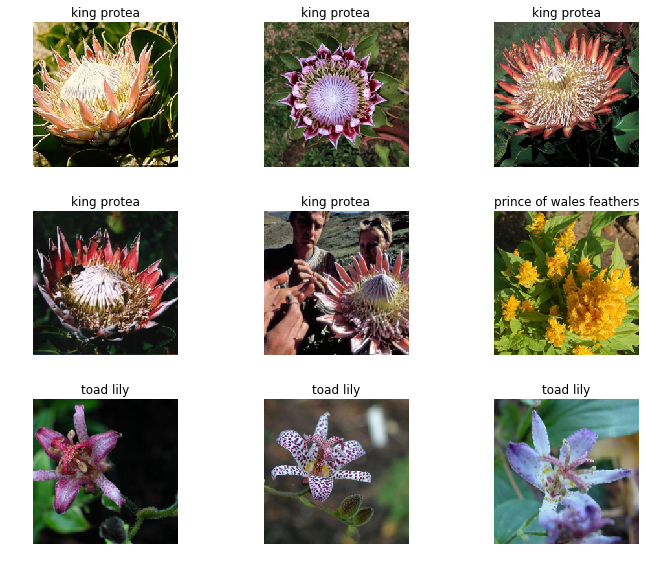

In [49]:
data.show_batch(rows=3, ds_type=DatasetType.Valid, figsize=(10, 8))

In [50]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy, bn_final=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:07<00:00, 24355418.72it/s]


In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


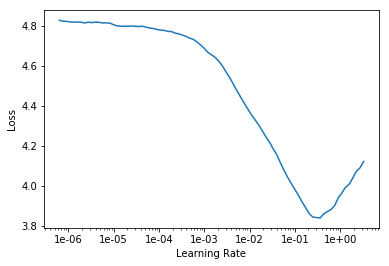

In [52]:
learn.recorder.plot()

In [54]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.941608,0.431325,0.888753,02:57
1,0.678397,0.335874,0.924205,02:55
2,0.520964,0.254462,0.938875,02:57
3,0.424942,0.211524,0.957213,02:57
4,0.359223,0.201911,0.958435,02:57


In [0]:
learn.save('stage-1')

In [0]:
intp = ClassificationInterpretation.from_learner(learn)

In [56]:
losses, idxs = intp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

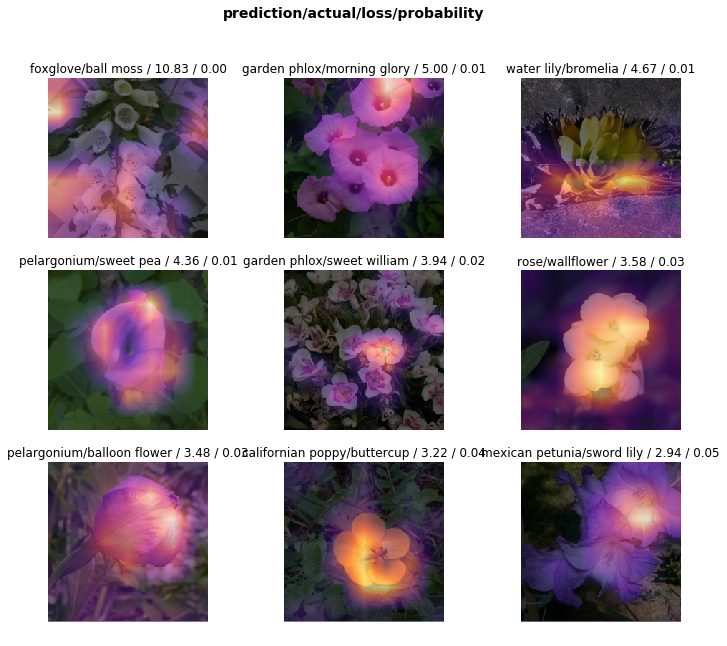

In [58]:
intp.plot_top_losses(9, figsize=(12,10))

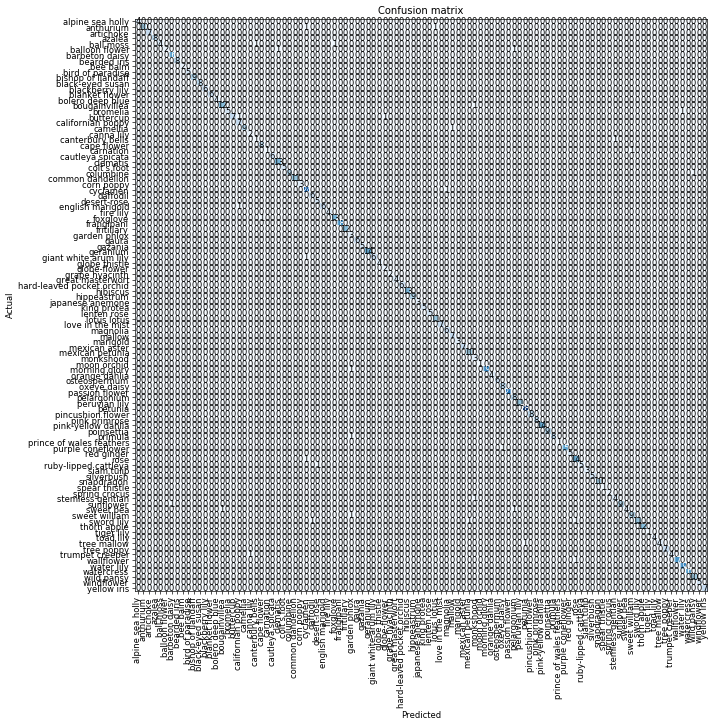

In [60]:
intp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [64]:
intp.most_confused(min_val=1)

[('anthurium', 'cyclamen', 1),
 ('anthurium', 'lotus lotus', 1),
 ('ball moss', 'canterbury bells', 1),
 ('ball moss', 'foxglove', 1),
 ('balloon flower', 'clematis', 1),
 ('balloon flower', 'pelargonium', 1),
 ('bougainvillea', 'monkshood', 1),
 ('bromelia', 'water lily', 1),
 ('buttercup', 'californian poppy', 1),
 ('buttercup', 'globe-flower', 1),
 ('camellia', 'mallow', 1),
 ('canterbury bells', 'stemless gentian', 1),
 ('carnation', 'sweet william', 1),
 ('columbine', 'wild pansy', 1),
 ('cyclamen', 'magnolia', 1),
 ('english marigold', 'californian poppy', 1),
 ('foxglove', 'cape flower', 1),
 ('giant white arum lily', 'cyclamen', 1),
 ('morning glory', 'garden phlox', 1),
 ('primula', 'garden phlox', 1),
 ('purple coneflower', 'oxeye daisy', 1),
 ('rose', 'cyclamen', 1),
 ('ruby-lipped cattleya', 'desert-rose', 1),
 ('stemless gentian', 'monkshood', 1),
 ('sunflower', 'barbeton daisy', 1),
 ('sweet pea', 'bougainvillea', 1),
 ('sweet pea', 'pelargonium', 1),
 ('sweet william', '

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-4, 1e-2))

In [68]:
learn.fit_one_cycle(4, max_lr=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.605690,1.316656,0.647922,03:06
1,0.729744,0.511840,0.867971,03:07
2,0.477594,0.215626,0.949878,03:08
3,0.319825,0.158934,0.969438,03:07


In [0]:
learn.save('stage-2');

In [0]:
learn.freeze()

In [71]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


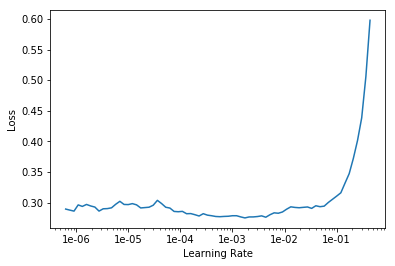

In [72]:
learn.recorder.plot()

In [73]:
learn.fit_one_cycle(6, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.283535,0.151069,0.970660,02:56
1,0.295038,0.152619,0.969438,02:57
2,0.266836,0.150389,0.968215,02:57
3,0.228795,0.133607,0.975550,02:58
4,0.203347,0.120430,0.981663,02:56
5,0.197810,0.117071,0.975550,02:57
